# Analyse de la table `clean_supply_chain_problem_2`

Ce notebook fournit une analyse visuelle des commandes et données logistiques.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

sys.path.append(os.path.abspath("../.."))
from utils.db_utils import connect_db

# Connexion à la base
engine = connect_db()
df = pd.read_sql("SELECT * FROM clean_supply_chain_problem", engine)

# Conversion des dates
df["order_date"] = pd.to_datetime(df["order_date"], errors="coerce")

df

,order_id,order_date,origin_port,carrier,tpt,service_level,ship_ahead_day_count,ship_late_day_count,customer,product_id,plant_code,destination_port,unit_quantity,weight,order_id_src,asset_id
0,1.447296e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,808,14.300000,1.447296e+09,TRUCK_10
1,1.447158e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,3188,87.940000,1.447158e+09,TRUCK_1
2,1.447139e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2331,61.200000,1.447139e+09,TRUCK_6
3,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,847,16.160000,1.447364e+09,TRUCK_1
4,1.447364e+09,2013-05-26,PORT09,V44_3,1,CRF,3,0,V55555_53,1700106,PLANT16,PORT09,2163,52.340000,1.447364e+09,TRUCK_7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9210,1.447305e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118,1.447305e+09,TRUCK_1
9211,1.447319e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,339,2.354118,1.447319e+09,TRUCK_7
9212,1.447322e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683388,PLANT03,PORT09,245,0.294265,1.447322e+09,TRUCK_2
9213,1.447145e+09,2013-05-26,PORT04,V444_1,1,DTD,5,0,V55555555555555_8,1683430,PLANT03,PORT09,278,2.480000,1.447145e+09,TRUCK_4


## Répartition des commandes en retard vs en avance

Pour voir la fréquence des retards logistiques :

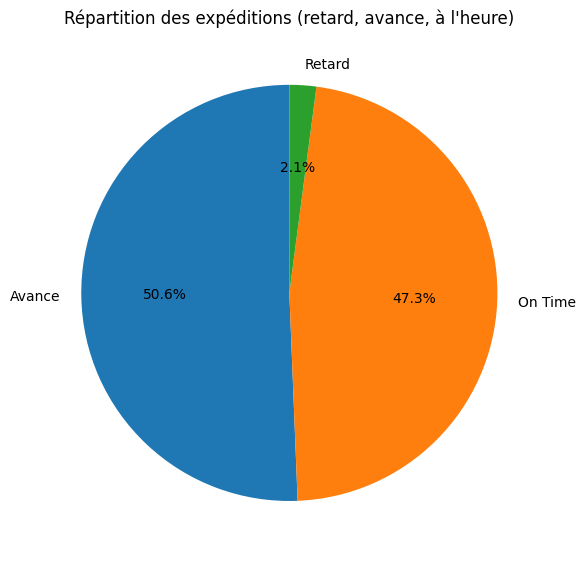

In [4]:
import matplotlib.pyplot as plt
import numpy as np 
conditions = [
    (df["ship_late_day_count"] > 0),
    (df["ship_ahead_day_count"] > 0)
]
choices = ["Retard", "Avance"]
df["expedition_status"] = np.select(conditions, choices, default="On Time")

plt.figure(figsize=(6, 6))
df["expedition_status"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Répartition des expéditions (retard, avance, à l'heure)")
plt.ylabel("")
plt.tight_layout()
plt.show()


##  Répartition des expéditions en avance vs en retard

Pour détecter les ports où les délais sont les plus longs :

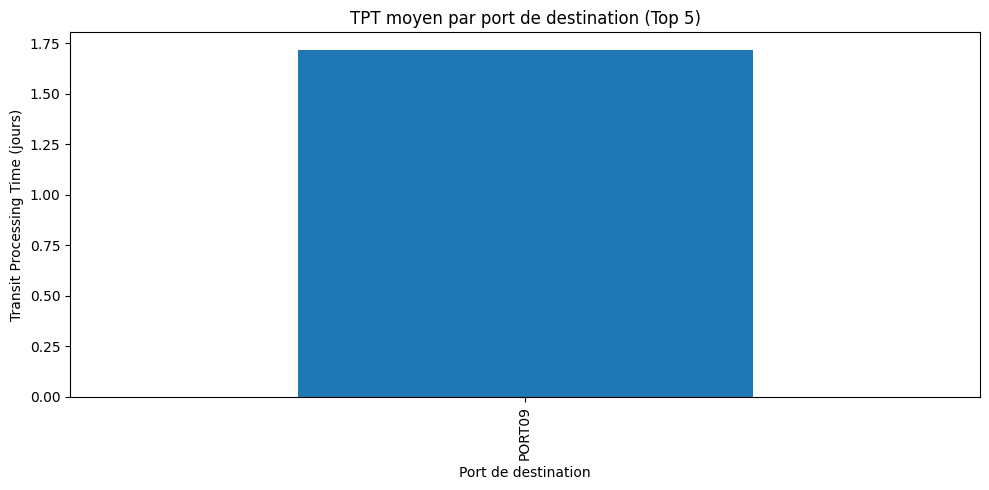

In [31]:
top_ports = df["destination_port"].value_counts().head(5).index
df_filtered = df[df["destination_port"].isin(top_ports)]

plt.figure(figsize=(10, 5))
df_filtered.groupby("destination_port")["tpt"].mean().sort_values().plot(kind="bar")
plt.title("TPT moyen par port de destination (Top 5)")
plt.ylabel("Transit Processing Time (jours)")
plt.xlabel("Port de destination")
plt.tight_layout()
plt.show()


##  Corrélation entre le poids et le TPT

Pour voir si les charges lourdes prennent plus de temps à être traitées :


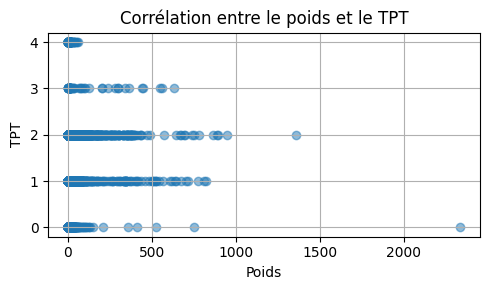

In [5]:
plt.figure(figsize=(5, 3))
plt.scatter(df["weight"], df["tpt"], alpha=0.5)
plt.title("Corrélation entre le poids et le TPT")
plt.xlabel("Poids")
plt.ylabel("TPT")
plt.grid(True)
plt.tight_layout()
plt.show()


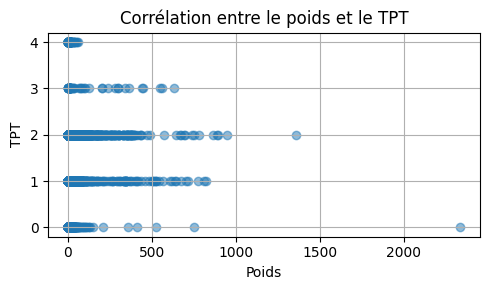

In [ ]:
import matplotlib as plt 
import pandas as pd 

plt.figure(figsize=(5, 3))
plt.scatter(df["weight"], df["tpt"], alpha=0.5)
plt.title("Corrélation entre le poids et le TPT")
plt.xlabel("Poids")
plt.ylabel("TPT")
plt.grid(True)
plt.tight_layout()
plt.show()

##  Temps de transport moyen par niveau de service

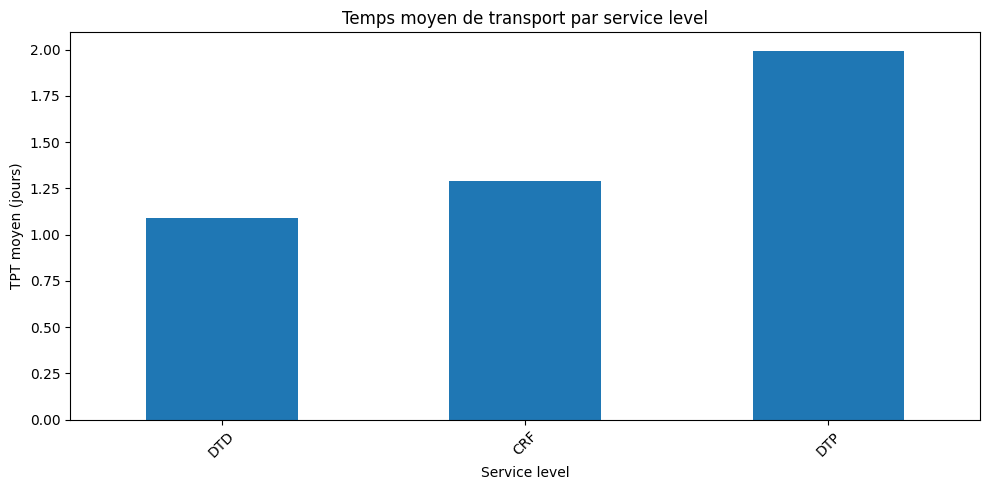

In [27]:
tpt_service = df.groupby("service_level")["tpt"].mean().sort_values()

tpt_service.plot(kind="bar", figsize=(10, 5))
plt.title("Temps moyen de transport par service level")
plt.ylabel("TPT moyen (jours)")
plt.xlabel("Service level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()